Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [16]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [17]:
airl = pd.read_excel('/content/EastWestAirlines.xlsx')

In [18]:
airl.head()

ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0    1    28143           0  ...                0               7000       0
1    2    19244           0  ...                0               6968       0
2    3    41354           0  ...                0               7034       0
3    4    14776           0  ...                0               6952       0
4    5    97752           0  ...                4               6935       1

[5 rows x 12 columns]

In [19]:
airl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [26]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airl_df = scaler.fit_transform(airl.iloc[:,1:])

In [27]:
scaled_airl_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Hierarchical cluster

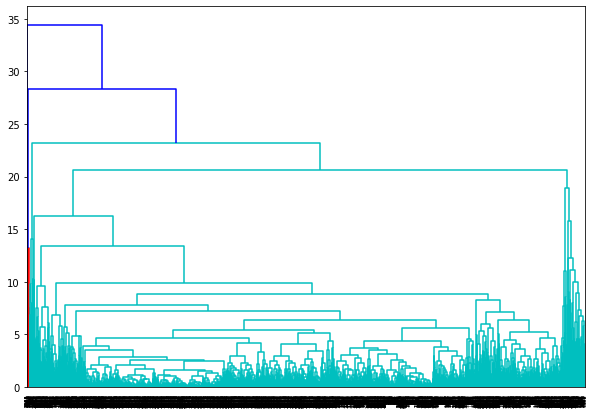

In [28]:
# create dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_airl_df, method='complete'))

In [30]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [32]:
# save clusters for chart
y_hc = hc.fit_predict(scaled_airl_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [33]:
Clusters

Clusters
0            0
1            0
2            0
3            0
4            0
...        ...
3994         0
3995         0
3996         0
3997         0
3998         0

[3999 rows x 1 columns]

In [34]:
airl['h_clusterid'] = Clusters

In [35]:
airl

ID#  Balance  Qual_miles  ...  Days_since_enroll  Award?  h_clusterid
0        1    28143           0  ...               7000       0            0
1        2    19244           0  ...               6968       0            0
2        3    41354           0  ...               7034       0            0
3        4    14776           0  ...               6952       0            0
4        5    97752           0  ...               6935       1            0
...    ...      ...         ...  ...                ...     ...          ...
3994  4017    18476           0  ...               1403       1            0
3995  4018    64385           0  ...               1395       1            0
3996  4019    73597           0  ...               1402       1            0
3997  4020    54899           0  ...               1401       0            0
3998  4021     3016           0  ...               1398       0            0

[3999 rows x 13 columns]

In [36]:
airl.groupby('h_clusterid').agg(['mean']).reset_index()

h_clusterid          ID#  ... Days_since_enroll    Award?
                      mean  ...              mean      mean
0           0  2037.480698  ...       4072.294553  0.350344
1           1  1551.212598  ...       4949.787402  0.811024
2           2  1664.866667  ...       4613.866667  0.533333
3           3  3128.000000  ...       2200.250000  1.000000
4           4   694.250000  ...       6835.892857  0.857143
5           5  2269.372093  ...       3968.930233  0.395349

[6 rows x 13 columns]

# K Mean Clustering

In [40]:
from sklearn.cluster import KMeans

In [41]:
airl1= pd.read_excel('/content/EastWestAirlines.xlsx')

In [42]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airl1_df = scaler.fit_transform(airl1.iloc[:,1:])

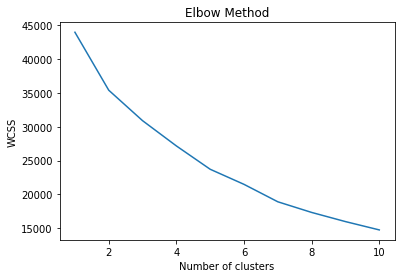

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airl1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(10, random_state=42)
clusters_new.fit(scaled_airl1_df)
clusters_new.labels_

array([9, 9, 9, ..., 7, 0, 0], dtype=int32)

In [46]:
#Assign clusters to the data set
airl1['clusterid_new'] = clusters_new.labels_

In [47]:
airl1

ID#  Balance  Qual_miles  ...  Days_since_enroll  Award?  clusterid_new
0        1    28143           0  ...               7000       0              9
1        2    19244           0  ...               6968       0              9
2        3    41354           0  ...               7034       0              9
3        4    14776           0  ...               6952       0              9
4        5    97752           0  ...               6935       1              1
...    ...      ...         ...  ...                ...     ...            ...
3994  4017    18476           0  ...               1403       1              7
3995  4018    64385           0  ...               1395       1              7
3996  4019    73597           0  ...               1402       1              7
3997  4020    54899           0  ...               1401       0              0
3998  4021     3016           0  ...               1398       0              0

[3999 rows x 13 columns]

In [48]:
airl1.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new          ID#  ... Days_since_enroll    Award?
                        mean  ...              mean      mean
0             0  3200.675351  ...       1982.786573  0.000000
1             1  1499.141509  ...       5053.064151  0.981132
2             2   960.480519  ...       6193.571429  0.844156
3             3  1860.109091  ...       4407.391736  0.000000
4             4  1886.938776  ...       4370.173469  0.765306
5             5  1664.866667  ...       4613.866667  0.533333
6             6  2080.963636  ...       3950.636364  0.527273
7             7  1972.808344  ...       4206.170795  1.000000
8             8  2269.372093  ...       3968.930233  0.395349
9             9  1151.723798  ...       5620.505549  0.000000

[10 rows x 13 columns]

# DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [50]:
airl2 = pd.read_excel('/content/EastWestAirlines.xlsx')
airl2.head()

ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0    1    28143           0  ...                0               7000       0
1    2    19244           0  ...                0               6968       0
2    3    41354           0  ...                0               7034       0
3    4    14776           0  ...                0               6952       0
4    5    97752           0  ...                4               6935       1

[5 rows x 12 columns]

In [56]:
airl2.shape

(3999, 11)

In [51]:
airl2.drop(['ID#'],axis=1,inplace=True)

In [52]:
array=airl2.values

In [53]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [54]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [55]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [57]:
dbscan = DBSCAN(eps=1, min_samples=11)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=11, n_jobs=None, p=None)

In [58]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [60]:
cl

cluster
0           0
1           0
2           0
3           0
4          -1
...       ...
3994        1
3995        1
3996        1
3997        0
3998        0

[3999 rows x 1 columns]

In [61]:
pd.concat([airl2,cl],axis=1)

Balance  Qual_miles  cc1_miles  ...  Days_since_enroll  Award?  cluster
0       28143           0          1  ...               7000       0        0
1       19244           0          1  ...               6968       0        0
2       41354           0          1  ...               7034       0        0
3       14776           0          1  ...               6952       0        0
4       97752           0          4  ...               6935       1       -1
...       ...         ...        ...  ...                ...     ...      ...
3994    18476           0          1  ...               1403       1        1
3995    64385           0          1  ...               1395       1        1
3996    73597           0          3  ...               1402       1        1
3997    54899           0          1  ...               1401       0        0
3998     3016           0          1  ...               1398       0        0

[3999 rows x 12 columns]